In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Resources/whatoplay_data.csv")
data = pd.read_csv("../Resources/MLdata.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1195 non-null   int64  
 1   Name             1195 non-null   int64  
 2   Platform         1195 non-null   int64  
 3   Year_of_Release  1195 non-null   int64  
 4   Genre            1195 non-null   int64  
 5   Publisher        1195 non-null   int64  
 6   NA_Sales         1195 non-null   float64
 7   EU_Sales         1195 non-null   float64
 8   JP_Sales         1195 non-null   float64
 9   Other_Sales      1195 non-null   float64
 10  Global_Sales     1195 non-null   float64
 11  Critic_Score     1195 non-null   int64  
 12  Critic_Count     1195 non-null   int64  
 13  User_Score       1195 non-null   float64
 14  User_Count       1195 non-null   int64  
 15  Developer        1195 non-null   int64  
 16  Rating           1195 non-null   int64  
 17  PlayScore     

In [3]:
data.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,User_Count,Developer,Rating,PlayScore,GameScore,CriticScore,GlobalSellers,TopSellers,TopRated,Critc_Count
0,0,323,2,2013,0,81,7.02,9.09,0.98,3.96,...,3994,303,2,9.29,9.34,9.24,0,1,1,46
1,1,109,2,2012,8,3,4.99,5.73,0.65,2.42,...,922,380,2,7.73,7.52,7.95,3,1,0,17
2,2,113,2,2011,8,3,5.54,5.73,0.49,1.57,...,5234,184,2,8.00,7.56,8.44,3,1,1,35
3,3,457,0,2011,6,56,5.03,4.02,2.69,0.91,...,632,300,0,9.09,9.77,8.41,3,1,1,69
4,4,108,2,2010,8,3,5.99,4.37,0.48,1.79,...,1094,380,2,8.16,7.91,8.41,3,1,1,54


In [4]:
data.drop(['Unnamed: 0'], axis=1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,User_Count,Developer,Rating,PlayScore,GameScore,CriticScore,GlobalSellers,TopSellers,TopRated,Critc_Count
0,323,2,2013,0,81,7.02,9.09,0.98,3.96,21.04,...,3994,303,2,9.29,9.34,9.24,0,1,1,46
1,109,2,2012,8,3,4.99,5.73,0.65,2.42,13.79,...,922,380,2,7.73,7.52,7.95,3,1,0,17
2,113,2,2011,8,3,5.54,5.73,0.49,1.57,13.32,...,5234,184,2,8.00,7.56,8.44,3,1,1,35
3,457,0,2011,6,56,5.03,4.02,2.69,0.91,12.66,...,632,300,0,9.09,9.77,8.41,3,1,1,69
4,108,2,2010,8,3,5.99,4.37,0.48,1.79,12.63,...,1094,380,2,8.16,7.91,8.41,3,1,1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,17,1,2008,1,10,0.00,0.01,0.00,0.00,0.01,...,148,114,2,6.02,5.66,6.38,2,0,0,15
1191,127,1,2007,8,17,0.00,0.01,0.00,0.00,0.01,...,218,227,2,7.04,7.38,6.71,2,0,0,21
1192,870,1,2012,0,3,0.01,0.00,0.00,0.00,0.01,...,121,175,3,8.39,8.98,7.80,2,0,0,9
1193,872,1,2009,0,58,0.00,0.01,0.00,0.00,0.01,...,488,144,1,8.61,9.34,7.87,2,0,0,46


In [5]:
#  Linear Regression 

In [6]:
X = data['CriticScore'].values.reshape(-1, 1)
y = data['Global_Sales'].values.reshape(-1, 1)
X.shape

(1195, 1)

In [7]:
y.shape

(1195, 1)

In [7]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.11637595745678442
Testing Score: 0.14259418504522559


Text(0.5, 1.0, 'Residual Plot')

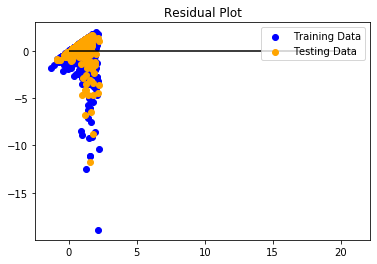

In [11]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [41]:
#Linear regression on multiple input features(Scores)

In [36]:
X = data[["Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore"]]
y = data['TopSellers'].values.reshape(-1, 1)
X.shape


(1195, 5)

In [40]:
X = data.drop(['TopSellers'], axis=1)
y = data['TopSellers'].values.reshape(-1, 1)
X.shape

(1195, 23)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [42]:
LR = model.fit(X_train, y_train)
LR
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6169195084737055
Testing Score: 0.6324661301731256


In [43]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.07027464984531034, R2: 0.6324661301731256


In [44]:
correlations = data.corr()["TopSellers"].sort_values()
correlations.tail(10)

Critic_Score    0.338786
PlayScore       0.355016
CriticScore     0.361259
Critc_Count     0.438886
Critic_Count    0.440206
EU_Sales        0.570726
Other_Sales     0.590206
NA_Sales        0.616170
Global_Sales    0.633337
TopSellers      1.000000
Name: TopSellers, dtype: float64

In [ ]:
# Deep Learning Neural Networks

In [17]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [18]:
features = data[["Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "TopSellers"]]

X = features.drop(['TopSellers'], axis=1)
y = features['TopSellers'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(1195, 5)
(1195, 1)


In [19]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [21]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=5))
model.add(Dense(units=2, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
28/28 - 0s - loss: 0.5873 - accuracy: 0.7522
Epoch 2/100
28/28 - 0s - loss: 0.5713 - accuracy: 0.7522
Epoch 3/100
28/28 - 0s - loss: 0.5564 - accuracy: 0.7522
Epoch 4/100
28/28 - 0s - loss: 0.5481 - accuracy: 0.7522
Epoch 5/100
28/28 - 0s - loss: 0.5337 - accuracy: 0.7522
Epoch 6/100
28/28 - 0s - loss: 0.5261 - accuracy: 0.7522
Epoch 7/100
28/28 - 0s - loss: 0.5176 - accuracy: 0.7522
Epoch 8/100
28/28 - 0s - loss: 0.5068 - accuracy: 0.7567
Epoch 9/100
28/28 - 0s - loss: 0.5068 - accuracy: 0.7600
Epoch 10/100
28/28 - 0s - loss: 0.4975 - accuracy: 0.7567
Epoch 11/100
28/28 - 0s - loss: 0.4909 - accuracy: 0.7634
Epoch 12/100
28/28 - 0s - loss: 0.4853 - accuracy: 0.7667
Epoch 13/100
28/28 - 0s - loss: 0.4868 - accuracy: 0.7723
Epoch 14/100
28/28 - 0s - loss: 0.4822 - accuracy: 0.7712
Epoch 15/100
28/28 - 0s - loss: 0.4796 - accuracy: 0.7723
Epoch 16/100
28/28 - 0s - loss: 0.4812 - accuracy: 0.7723
Epoch 17/100
28/28 - 0s - loss: 0.4768 - accuracy: 0.7824
Epoch 18/100
28/28 - 0s

In [ ]:
# adding more layers

In [29]:
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=5))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [96]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 10,902
Trainable params: 10,902
Non-trainable params: 0
_________________________________________________________________


In [30]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
28/28 - 0s - loss: 0.6164 - accuracy: 0.7020
Epoch 2/100
28/28 - 0s - loss: 0.5703 - accuracy: 0.7522
Epoch 3/100
28/28 - 0s - loss: 0.5407 - accuracy: 0.7522
Epoch 4/100
28/28 - 0s - loss: 0.5165 - accuracy: 0.7522
Epoch 5/100
28/28 - 0s - loss: 0.4965 - accuracy: 0.7634
Epoch 6/100
28/28 - 0s - loss: 0.4819 - accuracy: 0.7879
Epoch 7/100
28/28 - 0s - loss: 0.4772 - accuracy: 0.7857
Epoch 8/100
28/28 - 0s - loss: 0.4969 - accuracy: 0.7623
Epoch 9/100
28/28 - 0s - loss: 0.4757 - accuracy: 0.7902
Epoch 10/100
28/28 - 0s - loss: 0.4710 - accuracy: 0.7902
Epoch 11/100
28/28 - 0s - loss: 0.4716 - accuracy: 0.7879
Epoch 12/100
28/28 - 0s - loss: 0.4787 - accuracy: 0.7801
Epoch 13/100
28/28 - 0s - loss: 0.4750 - accuracy: 0.7779
Epoch 14/100
28/28 - 0s - loss: 0.4668 - accuracy: 0.7779
Epoch 15/100
28/28 - 0s - loss: 0.4678 - accuracy: 0.7846
Epoch 16/100
28/28 - 0s - loss: 0.4653 - accuracy: 0.7924
Epoch 17/100
28/28 - 0s - loss: 0.4683 - accuracy: 0.7824
Epoch 18/100
28/28 - 0s

In [31]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.4602 - accuracy: 0.7926
Normal Neural Network - Loss: 0.46019095182418823, Accuracy: 0.7926421165466309


In [32]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.4667 - accuracy: 0.7793
Deep Neural Network - Loss: 0.4667149782180786, Accuracy: 0.7792642116546631


In [ ]:
# Kmeans

In [46]:
features = data[["Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "TopSellers"]]

X = features['CriticScore'].values.reshape(-1, 1)
y = features['TopSellers'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(1195, 1)
(1195, 1)


In [40]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)